In [8]:
import io_utils

import pyspedas
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pytplot
import netCDF4
from pytplot import tplot
import seaborn as sns

bplot = 5

[382.53900785 382.53900785 382.53900785 ... 273.47840593 273.47840593
 273.47840593]


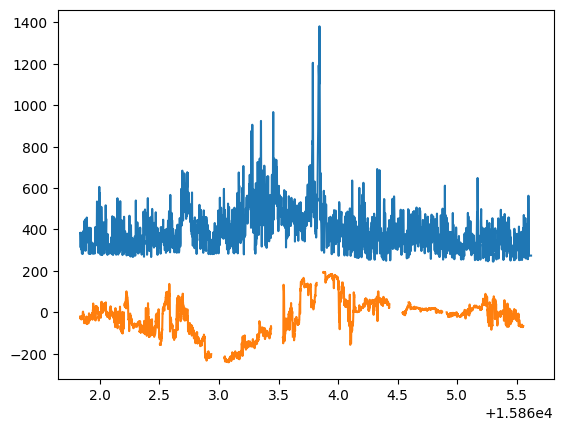

In [9]:
datadir = '/Users/alan/Downloads/AOS99/2013_06_05/'
lpfilename=datadir+'20130605.001_lp_1min-cal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20130605.001_ac_3min-cal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20130605.001_lp_1min-vvelsLat-geo-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

date = '2013-06-05'

df = pd.read_csv(date+'FINAL.csv')
# fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T
labels = []
indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtac[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtac[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
d = {
    'a':mdates.date2num(dtac),
    'b':fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T}
df2 = pd.DataFrame(d)
df2 = df2[df2['b'].notna()]
# print(mdates.date2num(dtac))
# print(fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T)
temps = np.interp(mdates.date2num(df['t']),xp=df2['a'], fp=df2['b'])
plt.plot(mdates.date2num(df['t']),temps)
plt.plot(mdates.date2num(df['t']),df['ybz']*20)
# goodaltsac=np.logical_not(np.isnan(fac['/FittedParams']['Altitude'][bplot,:]))
# plt.pcolormesh(mdates.date2num(dtac),fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3,fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T,vmin=0,vmax=3000,cmap='plasma')
# plt.ylim([80,200])
# fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T >= 1500

print(temps)
for t in temps:
    if t >= 1200:
        labels.append(1)
    else:
        labels.append(0)
df['Labels'] = labels
df.to_csv(date+'Labeled.csv')

[473.8317811  472.77614454 471.72050812 ... 345.14884851 345.14884851
 345.14884851]


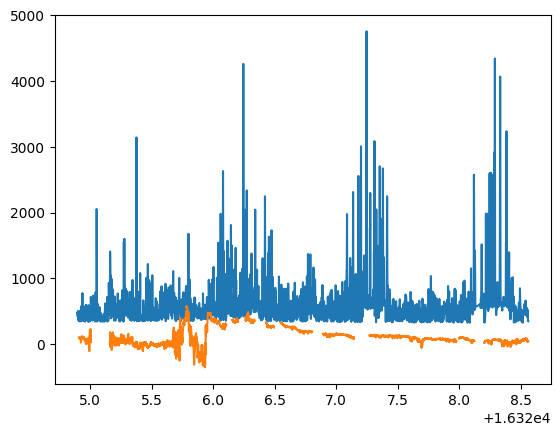

In [10]:
datadir = '/Users/alan/Downloads/AOS99/2014_09_11/'
lpfilename=datadir+'20140911.001_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20140911.001_ac_3min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20140911.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

date = '2014-09-11'

df = pd.read_csv(date+'FINAL.csv')
# fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T
labels = []
indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtac[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtac[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
d = {
    'a':mdates.date2num(dtac),
    'b':fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T}
df2 = pd.DataFrame(d)
df2 = df2[df2['b'].notna()]
temps = np.interp(mdates.date2num(df['t']),xp=df2['a'], fp=df2['b'])
plt.plot(mdates.date2num(df['t']),temps)
plt.plot(mdates.date2num(df['t']),df['ybz']*20)

print(temps)
for t in temps:
    if t >= 2500:
        labels.append(1)
    else:
        labels.append(0)
df['Labels'] = labels
df.to_csv(date+'Labeled.csv')

[355.69748479 355.88690166 356.07631848 ... 403.96499974 403.96499974
 403.96499974]


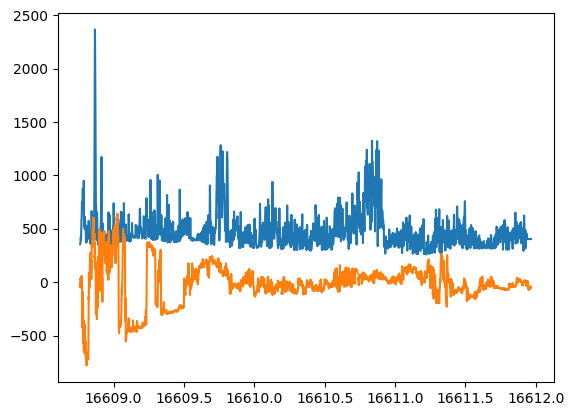

In [11]:
datadir = '/Users/alan/Downloads/AOS99/2015_06_22/'
lpfilename=datadir+'20150622.001_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20150622.001_ac_3min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20150622.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

date = '2015-06-22'

df = pd.read_csv(date+'FINAL.csv')
# fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T
labels = []
indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtac[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtac[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
d = {
    'a':mdates.date2num(dtac),
    'b':fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T}
df2 = pd.DataFrame(d)
df2 = df2[df2['b'].notna()]
temps = np.interp(mdates.date2num(df['t']),xp=df2['a'][:-5], fp=df2['b'][:-5])
plt.plot(mdates.date2num(df['t']),temps)
plt.plot(mdates.date2num(df['t']),df['ybz']*20)

print(temps)
for t in temps:
    if t >= 1200:
        labels.append(1)
    else:
        labels.append(0)
df['Labels'] = labels
df.to_csv(date+'Labeled.csv')

[262.8496983  262.72336433 262.5970304  ... 310.45119603 311.43752497
 312.42385366]


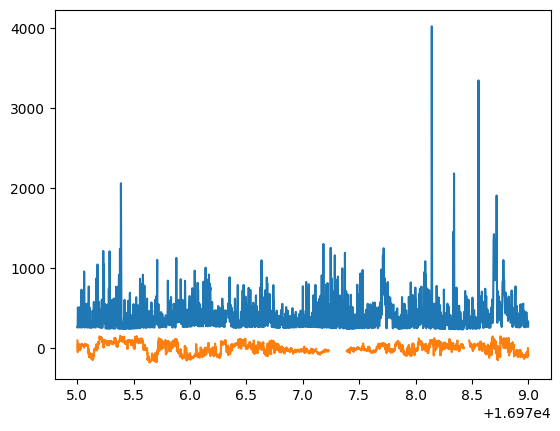

In [12]:
datadir = '/Users/alan/Downloads/AOS99/2016_06_23/'
lpfilename=datadir+'20160623.001_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20160623.001_ac_3min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20160623.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

date = '2016-06-23'

df = pd.read_csv(date+'FINAL.csv')
# fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T
labels = []
indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtac[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtac[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
d = {
    'a':mdates.date2num(dtac),
    'b':fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T}
df2 = pd.DataFrame(d)
df2 = df2[df2['b'].notna()]
temps = np.interp(mdates.date2num(df['t']),xp=df2['a'], fp=df2['b'])
plt.plot(mdates.date2num(df['t']),temps)
plt.plot(mdates.date2num(df['t']),df['ybz']*20)

print(temps)
for t in temps:
    if t >= 1500:
        labels.append(1)
    else:
        labels.append(0)
df['Labels'] = labels
df.to_csv(date+'Labeled.csv')

0       262.891682
1       256.659072
2       508.927306
3       439.435296
4       331.511597
           ...    
1860    273.646233
1861    333.258701
1862    339.290191
1863    264.421643
1864    313.344616
Name: b, Length: 1865, dtype: float64
0       16975.001505
1       16975.003646
2       16975.005787
3       16975.007928
4       16975.010081
            ...     
1860    16978.991192
1861    16978.993345
1862    16978.995486
1863    16978.997627
1864    16978.999780
Name: a, Length: 1865, dtype: float64
[17015.00097584 17015.00102069 17015.00106554 ... 17018.99913859
 17018.99918344 17018.99922828]
[852.65888486 852.65888486 852.65888486 ... 852.65888486 852.65888486
 852.65888486]


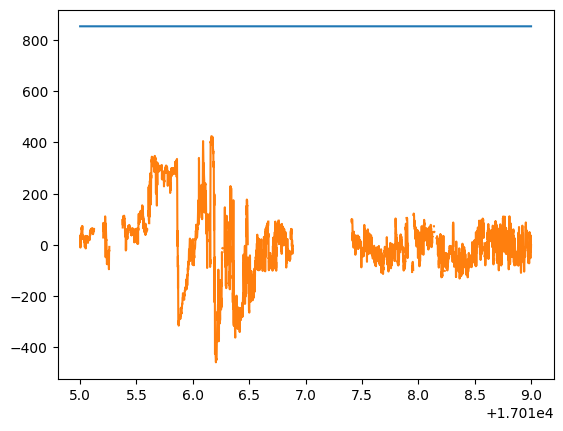

In [13]:
datadir = '/Users/alan/Downloads/AOS99/2016_08_02/'
lpfilename=datadir+'20160802.001_lp_1min-fitcal.h5'

#reconstructed vector velocities data file
vfilename=datadir+'20160802.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

date = '2016-08-02'

df = pd.read_csv(date+'FINAL.csv')
# fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T
labels = []
indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtac[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtac[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
d = {
    'a':mdates.date2num(dtac),
    'b':fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T}
df2 = pd.DataFrame(d)
df2 = df2[df2['b'].notna()]
# df2['a'] = df2['a'] + 406.64427456
print(df2['b'])
print(df2['a'])
df2 = df2[:-100]
print(mdates.date2num(df['t']))
temps = np.interp(mdates.date2num(df['t']),xp=df2['a'], fp=df2['b'])
plt.plot(mdates.date2num(df['t']),temps)
plt.plot(mdates.date2num(df['t']),df['ybz']*20)

print(temps)
for t in temps:
    if t >= 1200:
        labels.append(1)
    else:
        labels.append(0)
df['Labels'] = labels
df.to_csv(date+'Labeled.csv')

[614.77354974 623.40490126 632.03624858 ... 373.86453894 359.12087284
 344.37719957]


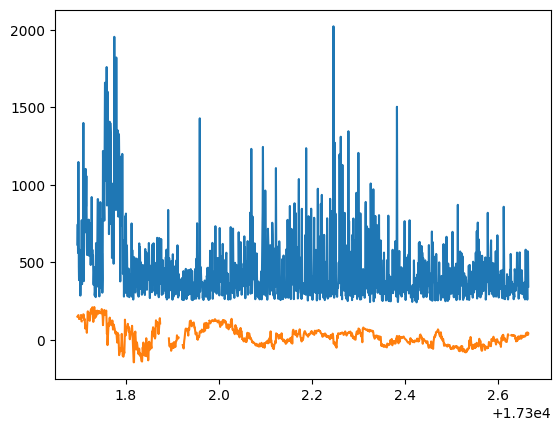

In [14]:
datadir = '/Users/alan/Downloads/AOS99/2017_05_15/'
lpfilename=datadir+'20170515.002_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20170515.002_ac_1min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20170515.002_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

date = '2017-05-15'

df = pd.read_csv(date+'FINAL.csv')
fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T
labels = []
indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtac[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtac[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
d = {
    'a':mdates.date2num(dtac),
    'b':fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T}
df2 = pd.DataFrame(d)
df2 = df2[df2['b'].notna()]
temps = np.interp(mdates.date2num(df['t']),xp=df2['a'], fp=df2['b'])
plt.plot(mdates.date2num(df['t']),temps)
plt.plot(mdates.date2num(df['t']),df['ybz']*20)

print(temps)
for t in temps:
    if t >= 1500:
        labels.append(1)
    else:
        labels.append(0)
df['Labels'] = labels
df.to_csv(date+'Labeled.csv')